In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/MyDrive/Practice Tensorflow Certification/Bài 3 - CNN or Transfer Learning

/content/drive/MyDrive/Practice Tensorflow Certification/Bài 3 - CNN or Transfer Learning


In [4]:
!wget --no-check-certificate \
  https://storage.googleapis.com/download.tensorflow.org/data/validation-horse-or-human.zip \
  -O ./validation-horse-or-human.zip

--2021-03-20 01:40:03--  https://storage.googleapis.com/download.tensorflow.org/data/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.20.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘./validation-horse-or-human.zip’

./validation-horse- 100%[===================>]  10.95M  64.3MB/s    in 0.2s    

2021-03-20 01:40:03 (64.3 MB/s) - ‘./validation-horse-or-human.zip’ saved [11480187/11480187]



In [5]:
!wget --no-check-certificate \
  https://storage.googleapis.com/download.tensorflow.org/data/horse-or-human.zip \
  -O ./horse-or-human.zip

--2021-03-20 01:40:10--  https://storage.googleapis.com/download.tensorflow.org/data/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.98.128, 74.125.195.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.98.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘./horse-or-human.zip’

./horse-or-human.zi 100%[===================>] 142.65M  76.2MB/s    in 1.9s    

2021-03-20 01:40:12 (76.2 MB/s) - ‘./horse-or-human.zip’ saved [149574867/149574867]



In [6]:
train_folder = "./horse-or-human"

In [7]:
!unzip -q horse-or-human.zip -d $train_folder

In [8]:
valid_folder = './validation-horse-or-human'

In [9]:
!unzip -q validation-horse-or-human.zip -d $valid_folder

In [10]:
%ls

'Bài 1 - CNN thuần.ipynb'
'Bài 1 - Transfer Learning.ipynb'
'CNN thuần - Phân lọai người ngựa.ipynb'
'Đề 2 - Cách 2 - Dataset.ipynb'
'Đề 2 - Rock-Paper-Scissors.ipynb'
'Đề 3 - Người và Ngựa.ipynb'
 horse-or-human/
 horse-or-human.zip
 inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
'Phân loại chó mèo.ipynb'
 Rock_paper_scissors_mobilenet_v2.ipynb
 validation-horse-or-human/
 validation-horse-or-human.zip


In [11]:
train_horse_dir = 'horse-or-human/horses'
train_human_dir = 'horse-or-human/humans'
valid_horse_dir = "validation-horse-or-human/horses"
valid_human_dir = "validation-horse-or-human/humans"

In [12]:
import tensorflow as tf

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [14]:
model = Sequential()

In [15]:
model.add(Conv2D(16, (3,3), activation="relu", input_shape = (300,300,3)))

In [16]:
model.add(MaxPooling2D(2,2))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
Total params: 448
Trainable params: 448
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.add(Conv2D(32, (3,3), activation="relu"))

In [19]:
model.add(MaxPooling2D(2,2))

In [20]:
model.add(Conv2D(64, (3,3), activation="relu"))

In [21]:
model.add(MaxPooling2D(2,2))

In [22]:
model.add(Flatten())

In [23]:
model.add(Dense(512, activation="relu"))

In [24]:
model.add(Dense(1, activation="sigmoid"))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 78400)             0

In [26]:
from tensorflow.keras.optimizers import RMSprop

In [27]:
model.compile(loss="binary_crossentropy", optimizer=RMSprop(learning_rate=0.001), metrics="acc")

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [29]:
train_generator = ImageDataGenerator(rescale=1/255)

In [30]:
valid_generator = ImageDataGenerator(rescale=1/255)

In [31]:
generated_train_data = train_generator.flow_from_directory(
    train_folder,
    target_size = (300, 300),
    batch_size = 128,
    class_mode = "binary"
)

Found 1027 images belonging to 2 classes.


In [32]:
generated_train_data

In [34]:
generated_valid_data = valid_generator.flow_from_directory(
    valid_folder,
    target_size = (300, 300),
    batch_size = 128,
    class_mode = "binary"
)

Found 256 images belonging to 2 classes.


In [35]:
history = model.fit_generator(
    generated_train_data,
    steps_per_epoch = 8,
    epochs = 15,
    verbose = 1,
    validation_data = generated_valid_data,
    validation_steps = 8
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
8/8 [==============================] - 14s 1s/step - loss: 4.9923 - acc: 0.4880 - val_loss: 0.5873 - val_acc: 0.5977
Epoch 2/15
8/8 [==============================] - 8s 926ms/step - loss: 0.6249 - acc: 0.6976
Epoch 3/15
8/8 [==============================] - 7s 832ms/step - loss: 0.6012 - acc: 0.7034
Epoch 4/15
8/8 [==============================] - 7s 845ms/step - loss: 0.4110 - acc: 0.8346
Epoch 5/15
8/8 [==============================] - 7s 821ms/step - loss: 0.1177 - acc: 0.9492
Epoch 6/15
8/8 [==============================] - 7s 922ms/step - loss: 0.0715 - acc: 0.9695
Epoch 7/15
8/8 [==============================] - 7s 805ms/step - loss: 0.2992 - acc: 0.8743
Epoch 8/15
8/8 [==============================] - 7s 828ms/step - loss: 0.0528 - acc: 0.9856
Epoch 9/15
8/8 [==============================] - 7s 796ms/step - loss: 0.0163 - acc: 0.9985
Epoch 10/15
8/8 [==============================] - 7s 911ms/step - loss: 0.0216 - acc: 0.9926
Epoch 11/15
8/8 [=================

In [36]:
model.save("mymodel.h5")

In [ ]:
ls

horse-or-human/     horse-person.h5             validation-horse-or-human.zip
horse-or-human.zip  validation-horse-or-human/


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

In [ ]:
uploaded = files.upload()
for fn in uploaded.keys():
  # prediction Process

  path = "./" + fn
  img = image.load_img(path, target_size=(150,150))
  x = image.img_to_array(img)/255

  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  print(images.shape)

  classes = model.predict(images, batch_size=10)

  if classes[0] > 0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving 17.jpg to 17.jpg
(1, 150, 150, 3)
17.jpg is a horse


In [ ]:
model.layers

In [ ]:
out_layers = [
              layer.output for layer in model.layers
]

In [ ]:
out_layers

[<tf.Tensor 'conv2d/Relu:0' shape=(None, 148, 148, 16) dtype=float32>,
 <tf.Tensor 'max_pooling2d/MaxPool:0' shape=(None, 74, 74, 16) dtype=float32>,
 <tf.Tensor 'conv2d_1/Relu:0' shape=(None, 72, 72, 32) dtype=float32>,
 <tf.Tensor 'max_pooling2d_1/MaxPool:0' shape=(None, 36, 36, 32) dtype=float32>,
 <tf.Tensor 'conv2d_2/Relu:0' shape=(None, 34, 34, 64) dtype=float32>,
 <tf.Tensor 'max_pooling2d_2/MaxPool:0' shape=(None, 17, 17, 64) dtype=float32>,
 <tf.Tensor 'flatten/Reshape:0' shape=(None, 18496) dtype=float32>,
 <tf.Tensor 'dense/Relu:0' shape=(None, 512) dtype=float32>,
 <tf.Tensor 'dense_1/Sigmoid:0' shape=(None, 1) dtype=float32>]

In [ ]:
import matplotlib.pyplot as plt

Saving nguoi.jpg to nguoi.jpg
(1, 150, 150, 3)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


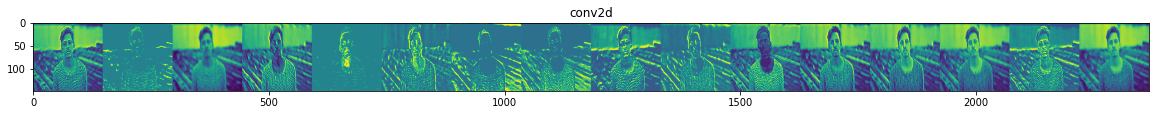

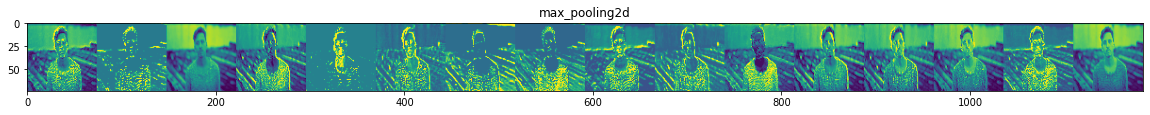

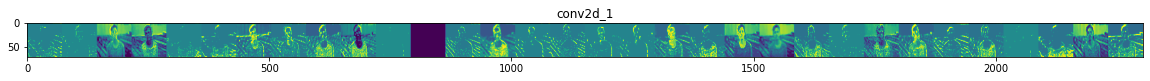

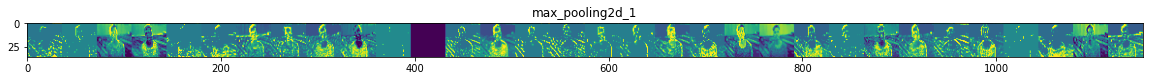

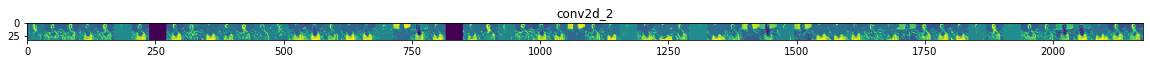

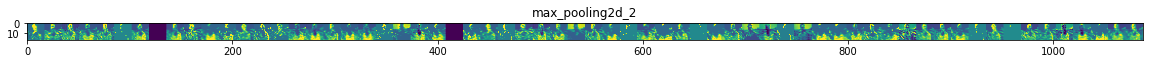

In [ ]:
uploaded = files.upload()
for fn in uploaded.keys():
  # prediction Process

  path = "./" + fn
  img = image.load_img(path, target_size=(150,150))
  x = image.img_to_array(img)/255

  x = x.reshape((1,) + x.shape)

  print(x.shape)

  visualization_model = tf.keras.models.Model(inputs = model.input, outputs = out_layers)

  successive_feature_maps = visualization_model.predict(x)

  layer_names = [layer.name for layer in model.layers]

  for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
      n_features = feature_map.shape[-1] # number of features in feature map
      
      #The feature map has shape (1, size, size, n_features)
      size = feature_map.shape[1]
      
      # We will title our images in this matrix
      display_gird = np.zeros((size, size*n_features))

      for i in range(n_features):
        # Postprocess the feature to make it visually palatable
        x = feature_map[0,:,:,i]
        x -= x.mean()
        x /= x.std()
        x *=64
        x += 128
        x = np.clip(x, 0, 255).astype('uint8')

        # We'll title each filter into this big horizontal gird
        display_gird[:, i*size:(i+1)*size] = x

      # Display the gird
      scale = 20. / n_features
      plt.figure(figsize=(scale*n_features,scale))
      plt.title(layer_name)
      plt.grid(False)
      plt.imshow(display_gird, aspect='auto', cmap='viridis')